In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler # 정규화

In [2]:
path ='/content/pima-indians-diabetes3.csv'

In [4]:
# 데이터 불러오기: 피마 인디언

raw = pd.read_csv(path)

df = raw.copy()
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# x(독립변수), y(종속변수)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
x

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [8]:
x.columns

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age'],
      dtype='object')

In [9]:
# 정규화

sc = StandardScaler()
# 표준화 : 평균 0, 분산(표준편차) 1

sc.fit_transform(x)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [10]:
pd.DataFrame(sc.fit_transform(x), columns=x.columns)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [11]:
scaled_x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
scaled_x

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


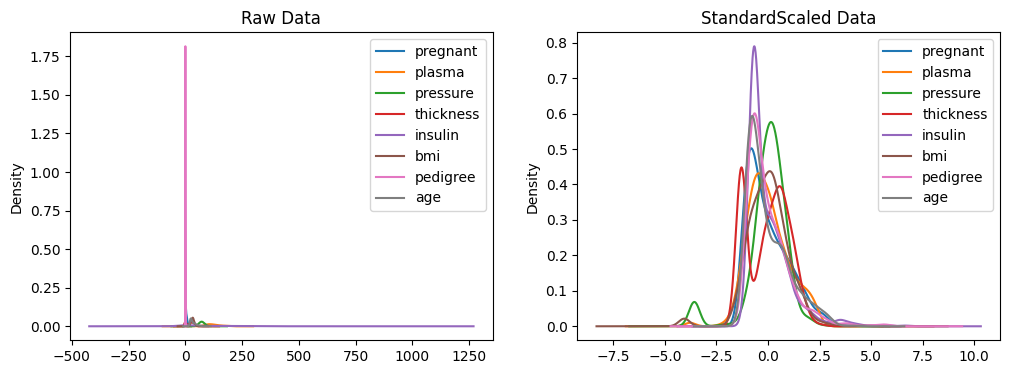

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

x.plot(kind='kde', title='Raw Data', ax=ax[0])
scaled_x.plot(kind='kde', title='StandardScaled Data', ax=ax[1])
plt.show()

# 데이터 스케일링 이전: 데이터가 너무 편협하게 분포되어 있음
# 데이터 스케일링 이후 : 데이터가 평균 0을 중심으로 모여 있음

In [13]:
# 데이터 셋 구분(학습용/ 평가용)

x_train, x_test, y_train, y_test =\
train_test_split(x,y, test_size=0.25, random_state=42)

1. 의사결정나무(결정트리)

In [14]:
from sklearn.tree import DecisionTreeClassifier

# 학습 환경 설정
dt = DecisionTreeClassifier()

In [15]:
# 학습 실행
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
# 테스트 셋에 적용
y_pred = dt.predict(x_test)

In [17]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [18]:
# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= dt, X=x_train, y=y_train, cv=skf)

In [19]:
# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

Acc:70.66%
Std:5.47%


2. 랜덤포레스트(Random Forest)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50)
# n_estimators : 몇 개의 결정트리를 사용할 것인지 결정하는 옵션

In [21]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [22]:
y_pred = rf.predict(x_test)

In [23]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [24]:
# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= rf, X=x_train, y=y_train, cv=skf)

In [25]:
# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

Acc:74.67%
Std:3.16%


3. 가우시안 나이브 베이즈

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
gnb = GaussianNB()

In [28]:
gnb.fit(x_train, y_train)

GaussianNB()

In [29]:
y_pred = gnb.predict(x_test)

In [30]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= gnb, X=x_train, y=y_train, cv=skf)

# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

Acc:74.83%
Std:4.25%


4. KNN(최근접 이웃)_지도학습

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [32]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(x_test)

In [34]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= knn, X=x_train, y=y_train, cv=skf)

# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

Acc:72.93%
Std:6.72%


AdaBoost(에이다 부스트)

In [35]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()

In [36]:
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [37]:
y_pred = adaboost.predict(x_test)

In [38]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= adaboost, X=x_train, y=y_train, cv=skf)

# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

Acc:73.64%
Std:4.66%


6. 이차 판별 분석

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

In [40]:
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [41]:
y_pred = qda.predict(x_test)

In [42]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= qda, X=x_train, y=y_train, cv=skf)
print(accuracy)
# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

[0.86206897 0.68965517 0.74137931 0.82758621 0.68965517 0.63793103
 0.64912281 0.70175439 0.89473684 0.75438596]
Acc:74.48%
Std:8.47%


7. Support Vector Machine(SVM)

In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [45]:
y_pred = svc.predict(x_test)

In [46]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= svc, X=x_train, y=y_train, cv=skf)
print(accuracy)
# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

[0.82758621 0.77586207 0.86206897 0.72413793 0.75862069 0.74137931
 0.75438596 0.75438596 0.71929825 0.77192982]
Acc:76.90%
Std:4.23%


8.서포트 벡터머신(rbf kernel)

In [48]:
rbf = SVC(kernel='rbf')
# rbf : support vector machine using radial basis functions kernel
# >> 비선형(선형으로 분리될 수 없는 경우 사용)

In [49]:
rbf.fit(x_train, y_train)

SVC()

In [50]:
y_pred = rbf.predict(x_test)

In [51]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= rbf, X=x_train, y=y_train, cv=skf)
print(accuracy)
# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

[0.75862069 0.86206897 0.82758621 0.75862069 0.72413793 0.74137931
 0.70175439 0.64912281 0.75438596 0.8245614 ]
Acc:76.02%
Std:6.04%


9. 보팅(Voting)

In [52]:
from sklearn.ensemble import VotingClassifier

In [53]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

In [54]:
vc = VotingClassifier(estimators = [('lr', clf1), ('rf', clf2),('svc', clf3)])

In [55]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(kernel='linear'))])

In [57]:
y_pred = vc.predict(x_test)

In [58]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= vc, X=x_train, y=y_train, cv=skf)
print(accuracy)
# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

[0.74137931 0.84482759 0.77586207 0.72413793 0.75862069 0.75862069
 0.85964912 0.70175439 0.77192982 0.70175439]
Acc:76.39%
Std:5.08%


10. 배깅(bagging)

In [59]:
from sklearn.ensemble import BaggingClassifier

In [60]:
bagging = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)

In [61]:
bagging.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC())

In [62]:
y_pred = bagging.predict(x_test)

In [63]:
# 계층별 교차 검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차검증을 통해 정확도 계산
accuracy = cross_val_score(estimator= bagging, X=x_train, y=y_train, cv=skf)
print(accuracy)
# 정확도와 표준편차 출력
print('Acc:{:.2f}%'.format(accuracy.mean()*100))
print('Std:{:.2f}%'.format(accuracy.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[0.82758621 0.84482759 0.72413793 0.68965517 0.75862069 0.70689655
 0.70175439 0.80701754 0.8245614  0.8245614 ]
Acc:77.10%
Std:5.79%


한 방에 끝내는 알고리즘 성능 비교

In [68]:
# 사용할 분류기 모두 지정하기

classifiers =\
[DecisionTreeClassifier(),
 RandomForestClassifier(),
 GaussianNB(),
 KNeighborsClassifier(),
 SVC(kernel='linear'),
 SVC(kernel='rbf'),
 AdaBoostClassifier(),
 QuadraticDiscriminantAnalysis(),
 VotingClassifier(
        estimators=[('1', AdaBoostClassifier()),
                    ('2', RandomForestClassifier()),
                    ('3', SVC(kernel='linear')),

                    ]),
 BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10,
                   random_state=42)


 ]

In [69]:
# 각 분류기 이름 지정

classifier_names = ['dt', 'rf', 'gnb', 'knn', 'svm_linear',
                   'svm_rbf','adaboost', 'qda', 'voting', 'bagging']

In [70]:
# 결과가 저장될 리스트

model_accuracy = []
model_means =[]
model_names =[]

# 각 분류기 실행 >> 결과 저장

classifier_data = zip(classifier_names, classifiers)

for classifier_name, classifier in classifier_data:
    # 계층별 교차 검증 환경 설정
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    # 교차검증을 통해 정확도 계산
    accuracy = cross_val_score(estimator= classifier, X=x_train, y=y_train, cv=skf)
    # 정확도와 표준편차 출력
    print("mean_accuracy: ", classifier_name, "{:.2f}%".format(accuracy.mean()*100))
    # 결과 저장
    model_accuracy.append(accuracy)
    model_means.append(accuracy.mean()*100)
    model_names.append(classifier_name)

mean_accuracy:  dt 72.23%
mean_accuracy:  rf 76.05%
mean_accuracy:  gnb 74.48%
mean_accuracy:  knn 73.27%
mean_accuracy:  svm_linear 76.91%
mean_accuracy:  svm_rbf 76.74%
mean_accuracy:  adaboost 74.15%
mean_accuracy:  qda 75.02%
mean_accuracy:  voting 76.39%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

mean_accuracy:  bagging 76.56%


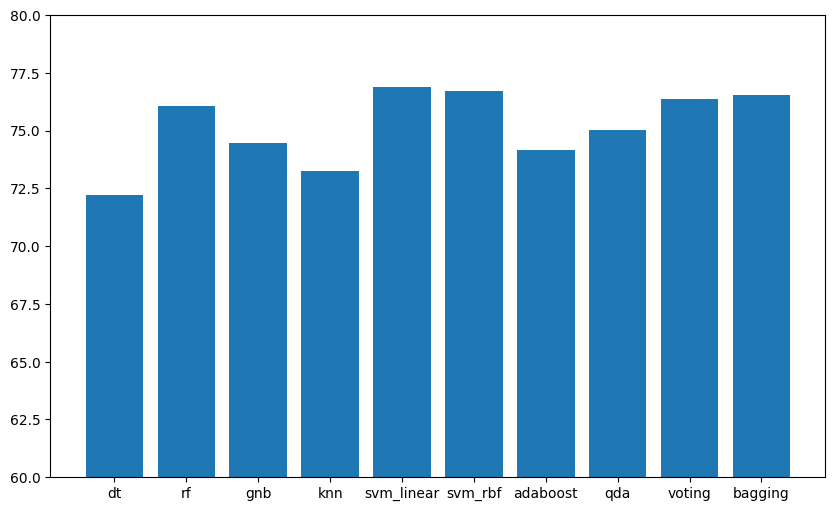

In [71]:
# 각 분류기 별 정확도 평균값을 막대 그래프로 출력
plt.figure(figsize=(10, 6))
plt.ylim([60,80])
plt.bar(model_names, model_means)
plt.show()

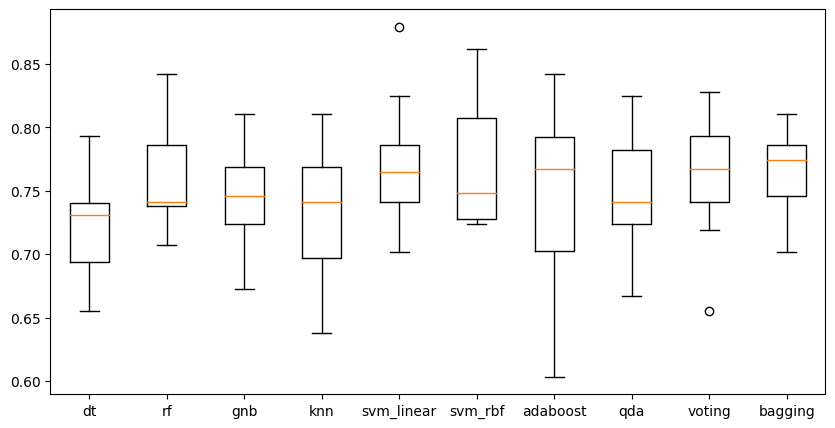

In [77]:
# 각 분류기 별 결과를 boxplot 로 출력
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.boxplot(model_accuracy)
ax.set_xticklabels(model_names)
plt.show()